# Exploratory Data Analysis - Google Local Data (2021)

### Table of Contents

1. [Import Packages](#import)    
2. [Load CSV files](#data)
3. [Basic Preprocessing](#preprocessing)
4. [Review Ratings](#ratings)

### Objective

The primary goal of this notebook is to conduct an Exploratory Data Analysis (EDA) on Google Local Data from 2021. The insights gained through this EDA will play a significant role in enhancing the data processing stage of the pipeline.

## 1. Import Packages<a class="anchor" id="import"></a>

In [3]:
import sys

sys.path.append("../src/utils/eda")

from eda_utils import (
    analyse_text, 
    create_pie_chart, 
    create_bar_plot, 
    map_rating_to_class,
    read_json_files,
    visualise_regex_results
)

## 2. Load CSV files<a class="anchor" id="data"></a>

From the initial exploration of Google Local Data (2021) [notebook](explore_google_local_review_data.ipynb), the relevant columns for the tasks of Sentiment Analysis and Text Generation are:

- `rating`
- `text`
- `resp`

Due to the size of dataset, we will sample and utilise a subset of the entire Google Local Data (2021) to perform EDA. For starters, we will utilise a subset of 10% of each JSON file.

In [2]:
folderpath = "../data/extracted/review"
sample_size = 0.1
seed = 42
dataframe = read_json_files(folderpath, seed, sample_size)

INFO:root:Read JSON file in dataframe - ../data/extracted/review/Connecticut_10_extracted.json
INFO:root:Read JSON file into dataframe - ../data/extracted/review/Connecticut_10_extracted.json
INFO:root:Read JSON file in dataframe - ../data/extracted/review/Tennessee_10_extracted.json
INFO:root:Read JSON file into dataframe - ../data/extracted/review/Tennessee_10_extracted.json
INFO:root:Read JSON file in dataframe - ../data/extracted/review/Arizona_10_extracted.json
INFO:root:Read JSON file into dataframe - ../data/extracted/review/Arizona_10_extracted.json
INFO:root:Read JSON file in dataframe - ../data/extracted/review/Texas_10_extracted.json
INFO:root:Read JSON file into dataframe - ../data/extracted/review/Texas_10_extracted.json
INFO:root:Read JSON file in dataframe - ../data/extracted/review/Alaska_10_extracted.json
INFO:root:Read JSON file into dataframe - ../data/extracted/review/Alaska_10_extracted.json
INFO:root:Read JSON file in dataframe - ../data/extracted/review/Californi

**Overview of Subset DataFrame:**

Total rows: 38,407,852

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38407852 entries, 0 to 38407851
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   rating  int64 
 1   text    object
 2   resp    object
dtypes: int64(1), object(2)
memory usage: 879.1+ MB


## 3. Basic Preprocessing<a class="anchor" id="preprocessing"></a>

In this section, we will perform the following basic preprocessing steps:
- Extract business owner response
- Check for Duplicated rows
- Check for `NaN` rows


**Extract business owner response:**

In [5]:
dataframe['resp'] = dataframe['resp'].apply(
    lambda x: x['text'] if x is not None else None
)

**Visualisation of Duplicated vs Non-Duplicated rows:**

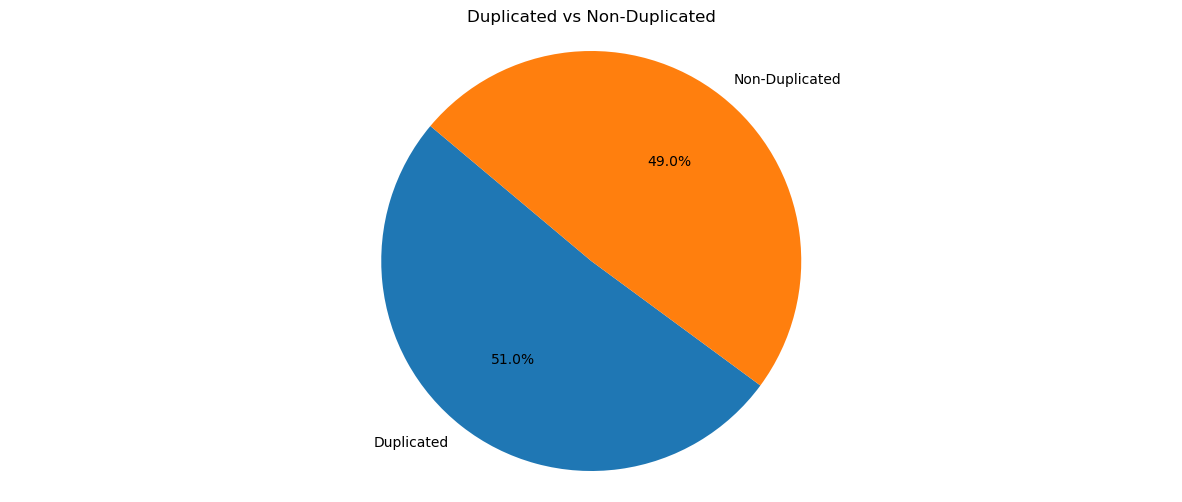

In [6]:
create_pie_chart(dataframe=dataframe, type_flag="duplicate")

**Remove duplicated rows:**

In [7]:
dataframe.drop_duplicates(inplace=True)

**Visualisation of rows with NaN vs Non-NaN values:**

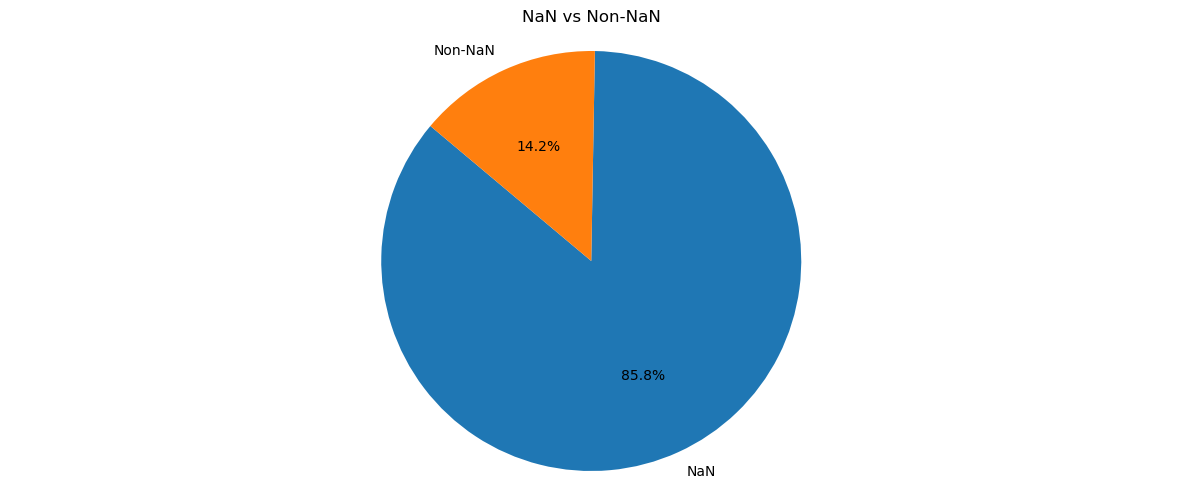

In [8]:
create_pie_chart(dataframe=dataframe, type_flag="nan")

**Remove rows with `NaN` values:**

In [9]:
dataframe.dropna(inplace=True)

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Insights</b>: 
    
- There exists duplicated rows and rows with `NaN` values in the Google Local Data (2021)
- In the data preprocessing script, we will include cleaning of duplicates and `NaN` values
</div>

## 4. Review Ratings<a class="anchor" id="ratings"></a>

In this section, we will perform an in-depth analysis of `rating` column.

**Visualisation of `rating`:**

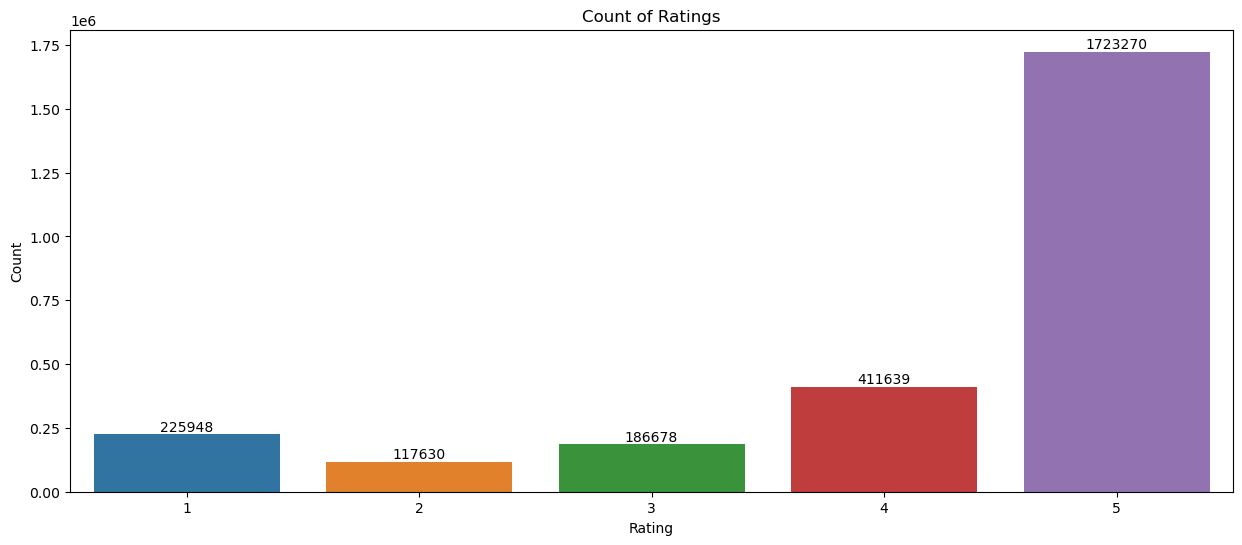

In [10]:
create_bar_plot(dataframe=dataframe, column="rating")

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Insights</b>: 
    
- The review ratings is on a scale of 1 to 5
- From the above visualisation, rating of `5.0` has the highest value count () while rating of `2.0` has the lowest value count ()
</div>

**Categorising `rating` into classes:**

In [11]:
dataframe['rating_class'] = dataframe['rating'].apply(map_rating_to_class)

**Visualising `rating_class`:**

In the visualisation below, we can observe that the majority class belongs to `positive` while the minority classes are `negative` and `neutral`. This suggests a case of imbalanced and will need to be handled when splitting the data for modelling.

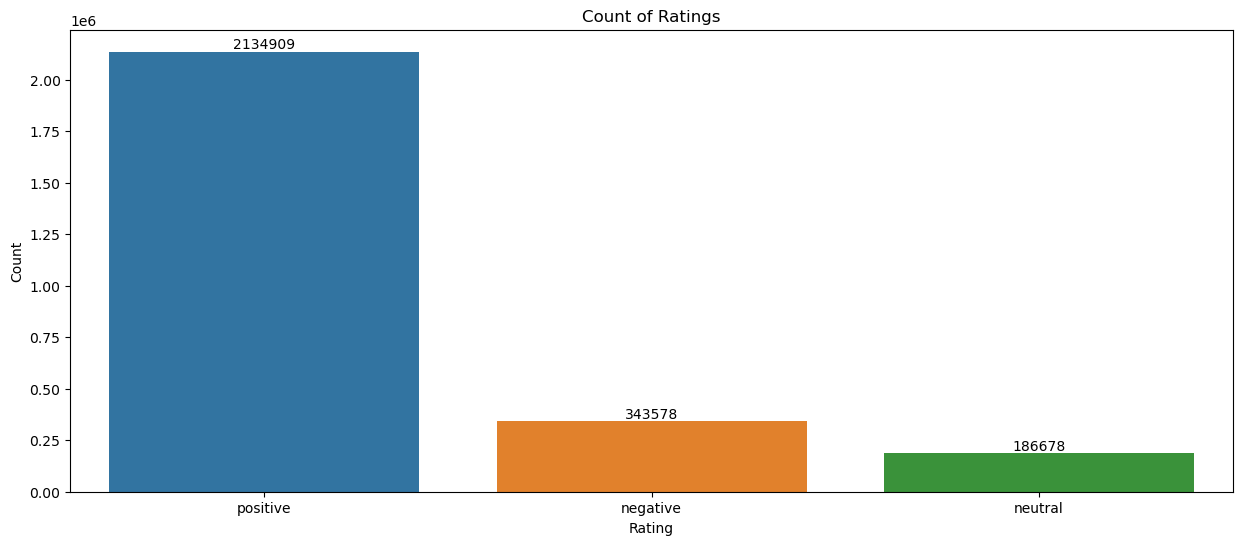

In [12]:
create_bar_plot(dataframe=dataframe, column="rating_class")

## 5. Review Text<a class="anchor" id="review"></a>

In this section, we will perform an in-depth analysis of `text` column. We will perform the following checks to understand the preprocessing steps required:

- Check for special characters instances **[Except for Punctuations]**
- Check for any URLs **[Starts with `http` or `https`]**
- Check for any contact numbers **[8 or more consecutive digits]**
- Check for consecutive white spaces **[2 or more whitespaces]**
- Check for unicode characters **[Non-ASCII characters]**

**Check and count of instances:**

In [21]:
regex_dict = {
    "special_characters": r'[^A-Za-z0-9\s.,!?]',
    "urls": r'(?:https?)\S+',
    "contact_numbers": r'\b\d{9,}\b',
    "whitespaces": r'[^\S\r\n]{2,}',
    "unicode": r'[^\x00-\x7F^…—–]+',
}
results = analyse_text(
    text_column=dataframe['text'], regex_dict=regex_dict, target="Regex"
)
results

,Regex,Count,Matches
0,special_characters,2719264,"[-, ', ', ', ', $, ', -, :, ', %, %, ', ', &, ..."
1,urls,3,[https://www.mlive.com/business/west-michigan/...
2,contact_numbers,22,"[209241472, 688860469, 688860469, 100000000, 0..."
3,whitespaces,797305,"[ , , , , , , , , , , , ..."
4,unicode,339304,"[👍🏼, ’, 👍, ’, ’, 👌, 😀, ’, ’, 💜, 🤦🏾‍♂️, 😊, ’, 👍..."


**Visualise Regex Results:**

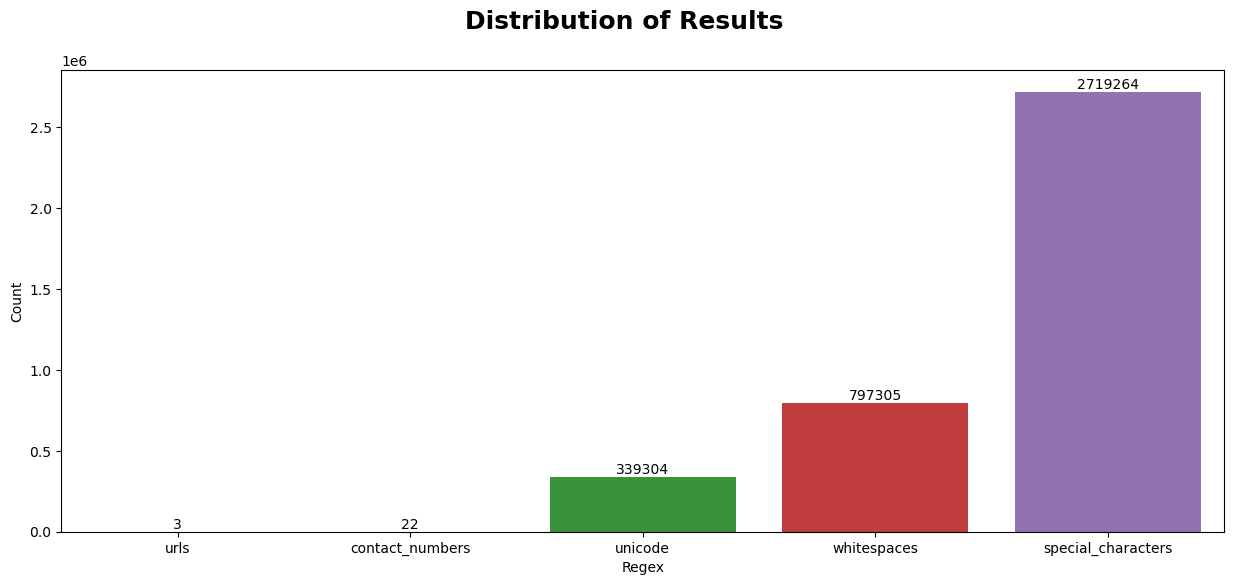

In [31]:
visualise_regex_results(results)

## 6. Response Text<a class="anchor" id="respone"></a>

In this section, we will perform an in-depth analysis of `resp` column similar to `text` column in the previous section. We will perform the following checks to understand the preprocessing steps required:

- Check for special characters instances **[Except for Punctuations]**
- Check for any URLs **[Starts with `http` or `https`]**
- Check for any contact numbers **[8 or more consecutive digits]**
- Check for consecutive white spaces **[2 or more whitespaces]**
- Check for unicode characters **[Non-ASCII characters]**

**Check and count of instances:**

In [32]:
results = analyse_text(
    text_column=dataframe['resp'], regex_dict=regex_dict, target="Regex"
)
results

,Regex,Count,Matches
0,special_characters,3665156,"[’, ', -, #, 💚, ', :, ), #, "", &, "", @, -, -, ..."
1,urls,90060,"[https://twitter.com/BofA_Help, https://www.fa..."
2,contact_numbers,2249,"[644071332296539, 2269578479745808, 2037235666..."
3,whitespaces,652533,"[ , , , , , , , , , , , ..."
4,unicode,401421,"[’, 💚, 😁, ’, ’, ♡, 🙏, ’, ’, ’, ’, ’, 😊, 😊, ’, ..."


**Visualise Regex Results:**

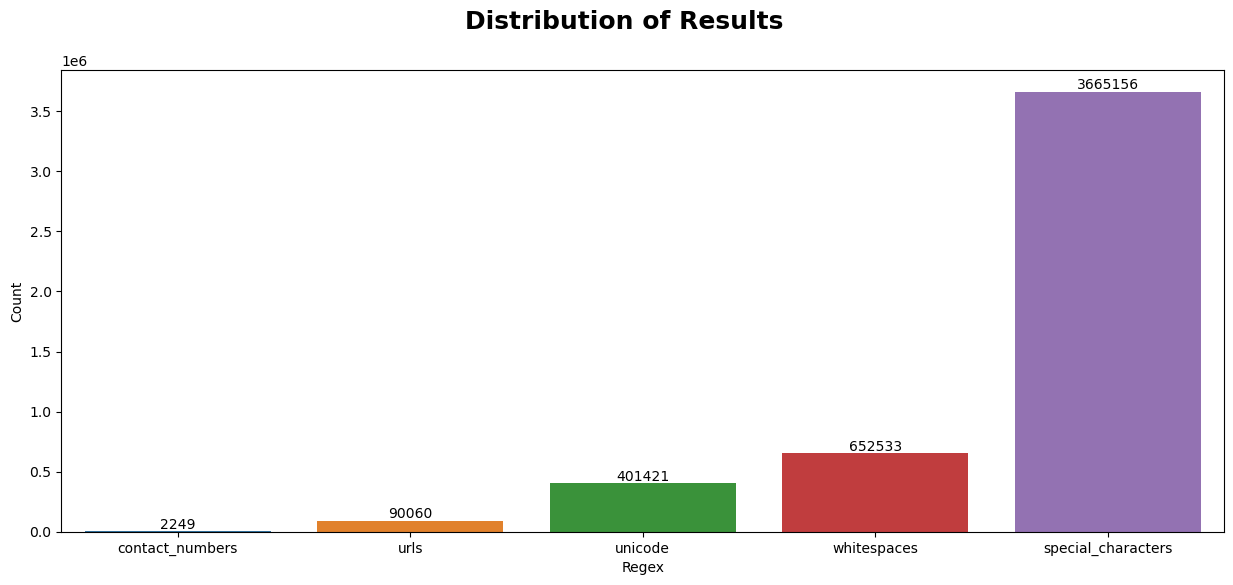

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

_, axis = plt.subplots(figsize = (15, 6))

results.sort_values(by=['Count'], ascending=True, inplace=True)
sns.barplot(
    data = results, 
    x = 'Regex', 
    y = 'Count',
)

# Set overall title
plt.suptitle("Distribution of Results", fontsize=18, fontweight='bold')

# Display respective bar count
for p in axis.patches:
    axis.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

# Display visualisation
plt.show()

## 7. Insights<a class="anchor" id="insights"></a>

To conclude this EDA, we conclude with a summary of all the findings and observations:

- In the `rating` column, there exists class imbalance which will factor into the choice of metrics subsequently.
- In both `text` and `resp` column, there exits many special characters that are not punctuations. We will remove all non-punctuation special characters to retain the readability of text.
- There exist many unicode characters in both `text` and `resp` columns which consists of unicode punctuations, emojis etc. We can utilise the `unidecode` library to remove/replace such instances.
- In the `resp` column, there are significantly more instances of contacts numbers and urls. This could indicate the owners' attempts to gather further feedback from reviewer via their appropriate customer feedback channel.